In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = '2.csv'
df = pd.read_csv(data)

df = df[(df.正負樣本 == 1) | (df.正負樣本 == -1)]

In [4]:
# 查看數據集的維度
df.shape

(830, 16)

In [5]:
# 讓我們預覽數據集
df.head()

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,股價,董監持股,ROE_Test,EPS_Test,毛利率_Test,現金殖利率_Test,股價_Test,董監持股_Test,符合數量,正負樣本
0,1101,台泥,11.00,3.69,26.64,5.87,39.85,8.38,1,1,1,1,1,0,5,1
1,1102,亞泥,9.81,4.05,24.67,6.29,44.05,27.37,0,1,1,1,1,1,5,1
2,1103,嘉泥,5.24,1.65,6.44,5.10,17.85,17.15,0,1,0,1,1,1,4,1
3,1104,環泥,6.66,1.82,14.24,4.79,21.70,24.16,0,1,0,0,1,1,3,-1
4,1108,幸福,1.71,0.21,8.77,5.47,10.60,3.95,0,1,0,1,1,0,3,-1


In [6]:
# 查看數據集摘要
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 829
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   代碼          830 non-null    int64  
 1   股票          830 non-null    object 
 2   ROE_5Y      830 non-null    float64
 3   EPS_5Y      830 non-null    float64
 4   毛利率_5Y      830 non-null    float64
 5   現金殖利率       830 non-null    float64
 6   股價          830 non-null    float64
 7   董監持股        830 non-null    float64
 8   ROE_Test    830 non-null    int64  
 9   EPS_Test    830 non-null    int64  
 10  毛利率_Test    830 non-null    int64  
 11  現金殖利率_Test  830 non-null    int64  
 12  股價_Test     830 non-null    int64  
 13  董監持股_Test   830 non-null    int64  
 14  符合數量        830 non-null    int64  
 15  正負樣本        830 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 110.2+ KB


In [7]:
col_names = ['ROE_5Y', 'EPS_5Y', '毛利率_5Y', '現金殖利率', '股價', '董監持股(%)','ROE_Test']

for col in col_names:
    
    print(df[col].value_counts())

 19.07    4
 9.51     3
-0.13     3
 2.70     3
 4.47     3
         ..
 4.17     1
 6.04     1
 1.48     1
 31.97    1
 8.58     1
Name: ROE_5Y, Length: 742, dtype: int64
 0.66    8
 1.75    7
-0.28    5
 1.68    5
 0.55    5
        ..
 1.31    1
 2.27    1
 4.25    1
 4.38    1
 2.61    1
Name: EPS_5Y, Length: 568, dtype: int64
27.33    3
30.69    3
18.67    3
22.37    3
11.54    3
        ..
25.12    1
40.15    1
12.02    1
35.00    1
16.63    1
Name: 毛利率_5Y, Length: 751, dtype: int64
0.00    34
3.76     5
2.62     5
4.24     5
4.89     5
        ..
9.20     1
7.38     1
3.40     1
4.99     1
4.38     1
Name: 現金殖利率, Length: 493, dtype: int64
14.20     5
83.20     4
12.00     4
23.20     4
16.55     4
         ..
20.75     1
158.00    1
56.90     1
313.50    1
20.50     1
Name: 股價, Length: 663, dtype: int64


KeyError: '董監持股(%)'

In [8]:
df['正負樣本'].value_counts()

 1    447
-1    383
Name: 正負樣本, dtype: int64

In [9]:
df.isnull().sum()

代碼            0
股票            0
ROE_5Y        0
EPS_5Y        0
毛利率_5Y        0
現金殖利率         0
股價            0
董監持股          0
ROE_Test      0
EPS_Test      0
毛利率_Test      0
現金殖利率_Test    0
股價_Test       0
董監持股_Test     0
符合數量          0
正負樣本          0
dtype: int64

In [10]:
X = df.drop(['代碼', '股票', 'ROE_Test', 'EPS_Test', '毛利率_Test', '現金殖利率_Test', '股價_Test', '董監持股_Test','符合數量','正負樣本'], axis=1)

y = df['正負樣本']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
X_train.shape, X_test.shape

((556, 6), (274, 6))

In [13]:
X_train.dtypes

ROE_5Y    float64
EPS_5Y    float64
毛利率_5Y    float64
現金殖利率     float64
股價        float64
董監持股      float64
dtype: object

In [14]:
X_train.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,股價,董監持股
264,3.05,0.42,25.66,2.59,10.80,6.26
545,5.06,1.51,12.96,3.09,33.00,32.77
576,9.51,2.77,21.25,2.81,59.70,35.51
350,7.55,1.51,23.74,7.00,16.85,2.85
299,15.18,2.57,21.35,4.99,39.65,7.50


In [15]:
import category_encoders as ce

In [16]:
encoder = ce.OrdinalEncoder(cols=['ROE_5Y', 'EPS_5Y', '毛利率_5Y', '現金殖利率', '股價', '董監持股'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [17]:
X_train.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,股價,董監持股
264,1,1,1,1,1,1
545,2,2,2,2,2,2
576,3,3,3,3,3,3
350,4,2,4,4,4,4
299,5,4,5,5,5,5


In [18]:
X_test.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,股價,董監持股
608,-1.0,-1.0,-1.0,136.0,-1.0,-1.0
457,-1.0,-1.0,-1.0,357.0,-1.0,-1.0
290,-1.0,-1.0,-1.0,95.0,-1.0,-1.0
558,-1.0,211.0,263.0,101.0,-1.0,-1.0
168,373.0,-1.0,487.0,88.0,-1.0,-1.0


In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
y_pred_gini = clf_gini.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4781


In [23]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([-1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [24]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.5719


In [25]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.5719
Test set score: 0.4781


[Text(0.5416666666666666, 0.875, 'X[4] <= 171.5\ngini = 0.497\nsamples = 556\nvalue = [256, 300]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 279.0\ngini = 0.499\nsamples = 227\nvalue = [119, 108]'),
 Text(0.16666666666666666, 0.375, 'X[0] <= 2.5\ngini = 0.5\nsamples = 198\nvalue = [97, 101]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.125, 'gini = 0.499\nsamples = 195\nvalue = [94, 101]'),
 Text(0.5, 0.375, 'X[1] <= 288.0\ngini = 0.366\nsamples = 29\nvalue = [22, 7]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.75, 0.625, 'X[5] <= 112.0\ngini = 0.486\nsamples = 329\nvalue = [137, 192]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8333333333333334, 0.375, 'X[3] <= 203.5\ngini = 0.488\nsamples = 323\nvalue = [137, 186]'),
 Text(0.75, 0.125, 'gini = 0.5\nsamples = 134\nvalue

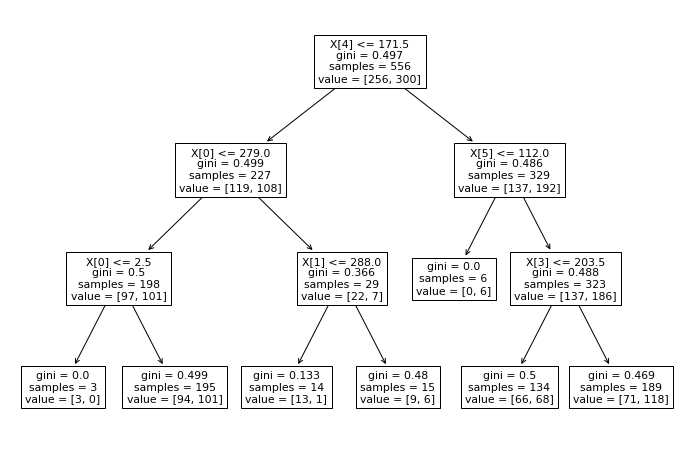

In [26]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 